In [29]:
import matplotlib.pyplot as plt
import numpy as np
import re
import json
from collections import Counter

In [30]:
# Function to tokenize text into words
def tokenize(text):
    return re.findall(r'\w+', text)

In [31]:
# Function to process data and create scatter plots
def process_and_plot(file_path, old_key, new_key, diff_key, xlabel, ylabel, output_file):
    # Step 1: Read and parse the JSONL file
    data = []
    with open(file_path, 'r') as file:
        data = [json.loads(line) for line in file]

    # Lists to store the values
    avg_lengths = []
    diff_lengths = []

    # Process each entry in the dataset
    for entry in data:
        old_text = entry['version_data'][0].get(old_key, '')
        new_text = entry['version_data'][1].get(new_key, '')
        diff_text = entry.get(diff_key, '')

        # Tokenize texts
        old_tokens = tokenize(old_text)
        new_tokens = tokenize(new_text)
        combined_tokens = old_tokens + new_tokens
        diff_tokens = tokenize(diff_text)

        # Compute average length and diff length
        avg_lengths.append(np.mean([len(combined_tokens)]))
        diff_lengths.append(len(diff_tokens))

    # Create the plot
    plt.figure(figsize=(8, 4))
    plt.scatter(avg_lengths, diff_lengths, color='blue')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

In [32]:
def process_project_distribution(file_path, output_file):
    """
    Process and plot the project distribution from a JSONL dataset.

    Args:
        file_path (str): Path to the JSONL file.
        output_file (str): Output file name for the plot.
    """
    # Initialize a list to hold the project names
    projects = []

    # Step 1: Read and parse the JSONL file
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            project = data['owner'] + '/' + data['project']
            projects.append(project)

    # Step 2: Count the occurrences of each project
    counter = Counter(projects)

    # Step 3: Calculate the total number of entries
    total_entries = len(projects)

    # Step 4: Calculate the percentage for each project
    project_percentages = {project: (count / total_entries) * 100 for project, count in counter.items()}

    # Step 5: Sort the projects by percentage (most to least)
    sorted_project_percentages = sorted(project_percentages.items(), key=lambda x: x[1], reverse=True)

    # Calculate cumulative percentages
    cumulative_percentages = []
    cumulative_sum = 0
    for _, percentage in sorted_project_percentages:
        cumulative_sum += percentage
        cumulative_percentages.append(cumulative_sum)

    # Sum of top 10 projects
    top_10_sum = sum([count for _, count in sorted_project_percentages[:10]])
    print(f"Top 10 projects account for {top_10_sum} entries")

    # Step 6: Plot the cumulative distribution
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_project_percentages)), cumulative_percentages, color='skyblue')
    plt.ylabel('Cumulative Percentage', fontsize=16)
    plt.xlabel('Number of Projects', fontsize=16)
    plt.xticks(fontsize=14)
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()


In [33]:
# Example usage
file_path = '../dataset/codocbench.jsonl'

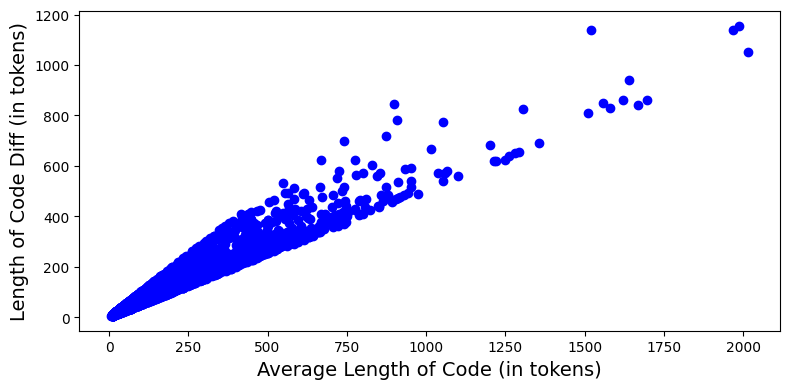

In [34]:
# Plot for code
process_and_plot(
    file_path=file_path,
    old_key='code',
    new_key='code',
    diff_key='diff_code',
    xlabel='Average Length of Code (in tokens)',
    ylabel='Length of Code Diff (in tokens)',
    output_file='Code_diff_scatter.pdf'
)

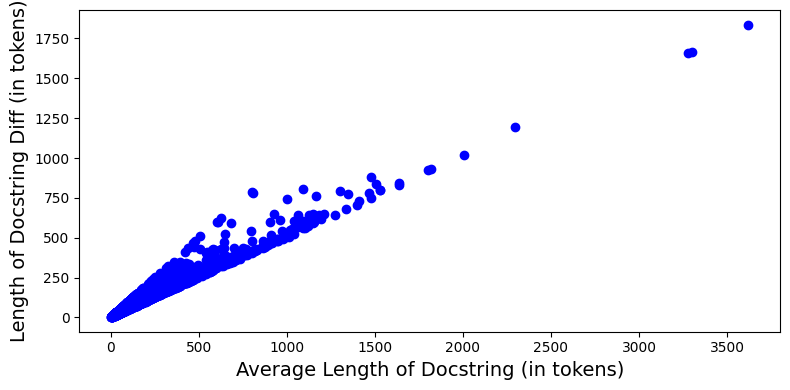

In [35]:
# Plot for docstring
process_and_plot(
    file_path=file_path,
    old_key='docstring',
    new_key='docstring',
    diff_key='diff_docstring',
    xlabel='Average Length of Docstring (in tokens)',
    ylabel='Length of Docstring Diff (in tokens)',
    output_file='docstring_diff_scatter.pdf'
)

Top 10 projects account for 36.321889350535756 entries


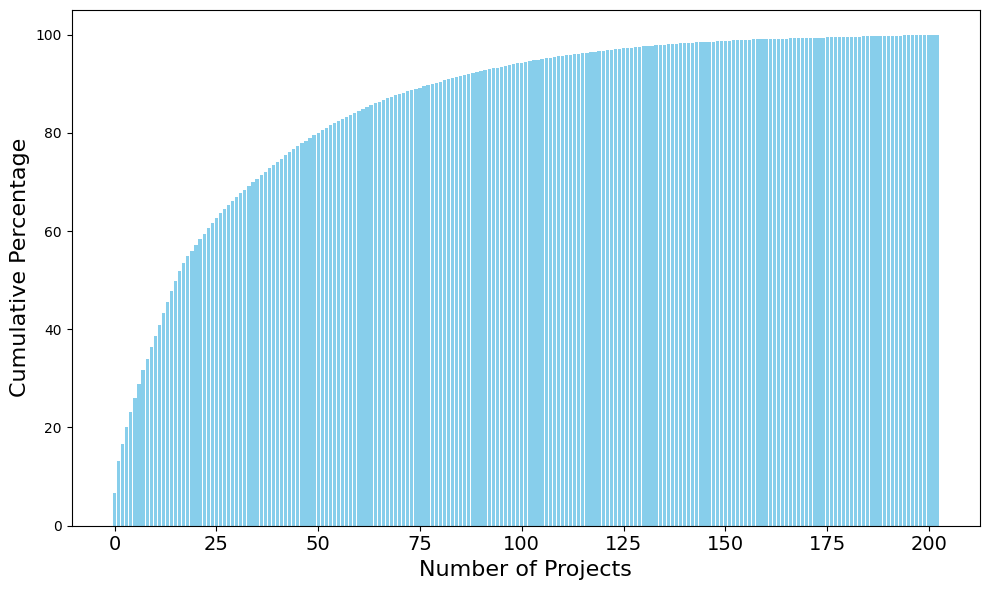

In [36]:
process_project_distribution(file_path, output_file='cumulative_distribution.pdf')